## Spadek wzdłuż gradientu

![gory_mgla](gory_mgla.png)

Załóżmy, że zabłądziliśmy w górach podczas gęstej mgły i wyczuwamy jedynie nachylenie terenu pod stopami. Logicznym zejściem na dno doliny jest podążanie w dół po jak największej pochyłości. DokłAdnie taki jest mechanizm działania gradientu prostego: algorytm mierzy lokalny gradient funkcji błędu w odniesieniu do wektora parametrów $ \boldsymbol{\beta} $, a następnie podąża w kierunku malejącego gradientu. Po uzyskaniu wartości 0 docieramy do minimum funkcji.

## Spadek wzdłuż gradientu

Spadek wzdłuż gradientu (gradient descent) to iteracyjna metoda optymalizacji, która jest używana do minimalizacji funkcji kosztu, w tym przypadku sumy kwadratów reszt. W kontekście regresji liniowej, algorytm ten polega na aktualizacji współczynników regresji w kierunku przeciwnym do gradientu funkcji kosztu. Procedura ta wygląda następująco:

1. Inicjalizuj wartości współczynników (np. losowo).
2. Oblicz gradient funkcji kosztu, który wskazuje kierunek największego wzrostu funkcji.
3. Zaktualizuj współczynniki, odejmując od nich wartość gradientu pomnożoną przez współczynnik uczenia (learning rate).
4. Powtarzaj kroki 2 i 3, aż do osiągnięcia zadowalającego poziomu konwergencji (np. gdy zmiany w współczynnikach są mniejsze niż zadany próg).

Spadek wzdłuż gradientu jest szczególnie przydatny w przypadku dużych zbiorów danych, gdzie obliczanie macierzy odwrotnej (jak w równaniu normalnym) może być niepraktyczne. Metoda ta pozwala na efektywne dopasowanie modelu, nawet w sytuacjach, gdy liczba zmiennych jest bardzo duża. 

Obie metody (równanie normalne, spadek wzdłóż gradientu) mają swoje zalety i ograniczenia, a wybór między nimi zależy od specyfiki problemu oraz dostępnych zasobów obliczeniowych.

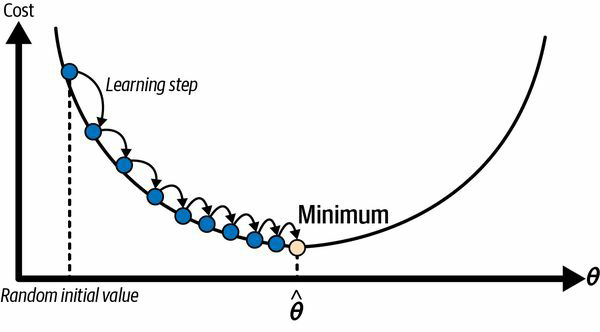

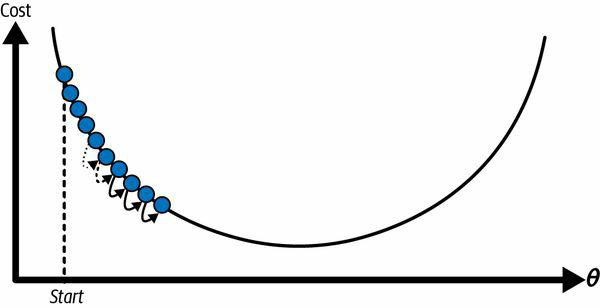

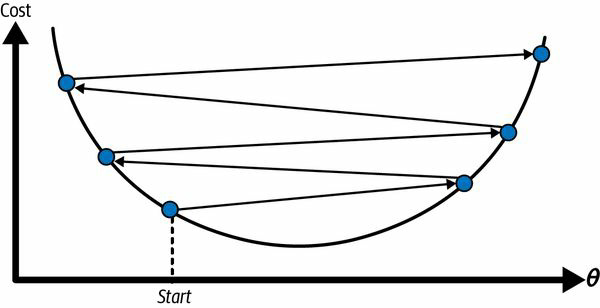

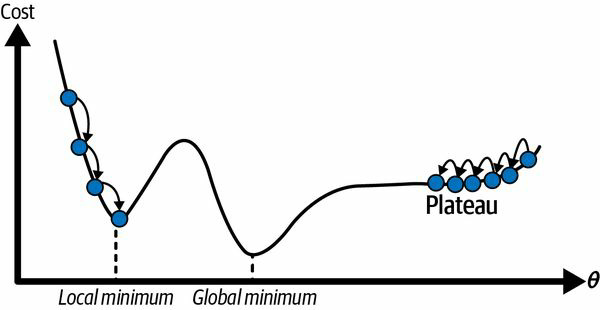

Na szczęście funkcja kosztu dla regresji liniowej jest wypukła. Nie istnieją lokalne minima. Tak więc, metoda gradientu prostego gwarantuje zbliżenie się do minimum globalnego.

## Przykład w kodzie:

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

In [2]:
X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


In [3]:
X1 = X1.reshape(m, 1)
Y = Y.reshape(-1, 1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


In [4]:
bias = np.ones((m, 1))
print(bias)
print(bias.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


In [5]:
X = np.append(bias, X1, axis=1)
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


### <a name='3'></a> Losowa inicjalizacja parametrów

In [51]:
eta = 0.01

weights = np.random.randn(2, 1)
print(X)
print(weights)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
[[ 0.23521011]
 [-0.77218628]]


### <a name='4'></a> Metoda gradientu prostego (wsadowego gradientu prostego)

In [59]:
intercept = []
coef = []
eta = 0.01

for i in range(3000):
    gradient = (2 / m) * X.T.dot(X.dot(weights) - Y)
    weights = weights - eta * gradient
    intercept.append(weights[0][0])
    coef.append(weights[1][0])

print(weights)

[[2750.]
 [ 250.]]


## Spadek wzdłuż gradientu

Spadek wzdłuż gradientu (ang. gradient descent) to popularna metoda optymalizacji używana w uczeniu maszynowym i statystyce do minimalizacji funkcji kosztu. Główna idea polega na iteracyjnym dostosowywaniu parametrów modelu (np. wag) w kierunku przeciwnym do gradientu funkcji kosztu, co prowadzi do zmniejszenia wartości tej funkcji.

### Kluczowe pojęcia

- **Gradient**: Wektor, który wskazuje kierunek największego wzrostu funkcji. W kontekście spadku wzdłuż gradientu, interesuje nas kierunek przeciwny, ponieważ chcemy minimalizować funkcję.
- **Wagi (weights)**: Parametry modelu, które są aktualizowane podczas procesu uczenia.
- **Eta (η)**: Współczynnik uczenia, który kontroluje rozmiar kroku aktualizacji wag.
- **Funkcja kosztu**: Miara błędu modelu, często używana do oceny jakości dopasowania modelu do danych.

## Opis algorytmu

Poniżej znajduje się opis algorytmu spadku wzdłuż gradientu zaimplementowanego w Pythonie:

```python
for i in range(3000):
    gradient = (2 / m) * X.T.dot(X.dot(weights) - Y)
    weights = weights - eta * gradient
    intercept.append(weights[0][0])
    coef.append(weights[1][0])
```

### Szczegóły działania

1. **Iteracje**: Pętla `for i in range(3000)` oznacza, że algorytm będzie wykonywał 3000 kroków aktualizacji wag. Liczba iteracji jest ustalana na podstawie wymagań modelu oraz zbieżności.

2. **Obliczanie gradientu**:
   - `X.dot(weights)` oblicza przewidywania modelu na podstawie aktualnych wag.
   - `X.dot(weights) - Y` oblicza różnicę między przewidywaniami a rzeczywistymi wartościami (`Y`), co daje nam błąd.
   - `X.T.dot(...)` mnoży transponowaną macierz cech przez błąd, co pozwala uzyskać gradient funkcji kosztu.
   - `(2 / m)` to współczynnik normalizujący, gdzie `m` to liczba próbek. Umożliwia to uzyskanie średniego gradientu.

3. **Aktualizacja wag**:
   - `weights = weights - eta * gradient` aktualizuje wagi modelu. Wartość `eta * gradient` określa wielkość kroku w kierunku przeciwnym do gradientu. Dzięki temu wagi są dostosowywane w kierunku minimalizacji błędu.

4. **Zbieranie wyników**:
   - `intercept.append(weights)` i `coef.append(weights)` dodają aktualne wartości interceptu i współczynnika do listy, co pozwala na śledzenie zmian tych wartości podczas kolejnych iteracji.

In [9]:
df = pd.DataFrame(data={'intercept': intercept, 'coef': coef})
df

,intercept,coef
0,71.251731,268.733125
1,123.515378,450.563123
2,162.005651,573.579566
3,191.114969,656.586702
4,213.831600,712.377355
...,...,...
2995,2749.955330,250.010434
2996,2749.955493,250.010396
2997,2749.955655,250.010358
2998,2749.955817,250.010320


In [10]:
px.line(df, y='intercept', width=800, title='Dopasowanie: intercept')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>intercept=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'utC64LrwuwC7ELsguzC7QLtQu2C7cL'),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('O1h3XBzQUUBiu3Dy++BeQG4q/ksuQG' ... 'iiS+l7pUATdthg6XulQB/i+nXpe6VA'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Dopasowanie: intercept'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'intercept'}}}
})

In [11]:
px.line(df, y='coef', width=800, title='Dopasowanie: coef')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'index=%{x}<br>coef=%{y}<extra></extra>',
              'legendgroup': '',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': '',
              'showlegend': False,
              'type': 'scattergl',
              'x': {'bdata': ('AAABAAIAAwAEAAUABgAHAAgACQAKAA' ... 'utC64LrwuwC7ELsguzC7QLtQu2C7cL'),
                    'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('AvPF4brLcEAP8ymNAil8QDCPbPOi7I' ... 'Nj2lRAb0AibB2LVEBvQCs1ITxUQG9A'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Dopasowanie: coef'},
               'width': 800,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'index'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'coef'}}}
})

In [123]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=10000, penalty=None, eta0=0.01, tol=1e-5)
sgd_reg.fit(X1, Y.ravel())

,"loss loss: str, default='squared_error'The loss function to be used. The possible values are 'squared_error','huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'The 'squared_error' refers to the ordinary least squares fit.'huber' modifies 'squared_error' to focus less on getting outlierscorrect by switching from squared to linear loss past a distance ofepsilon. 'epsilon_insensitive' ignores errors less than epsilon and islinear past that; this is the loss function used in SVR.'squared_epsilon_insensitive' is the same but becomes squared loss pasta tolerance of epsilon.More details about the losses formulas can be found in the:ref:`User Guide `.",'squared_error'
,"penalty penalty: {'l2', 'l1', 'elasticnet', None}, default='l2'The penalty (aka regularization term) to be used. Defaults to 'l2'which is the standard regularizer for linear SVM models. 'l1' and'elasticnet' might bring sparsity to the model (feature selection)not achievable with 'l2'. No penalty is added when set to `None`.You can see a visualisation of the penalties in:ref:`sphx_glr_auto_examples_linear_model_plot_sgd_penalties.py`.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term. The higher thevalue, the stronger the regularization. Also used to compute thelearning rate when `learning_rate` is set to 'optimal'.Values must be in the range `[0.0, inf)`.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1.l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1.Only used if `penalty` is 'elasticnet'.Values must be in the range `[0.0, 1.0]` or can be `None` if`penalty` is not `elasticnet`... versionchanged:: 1.7 `l1_ratio` can be `None` when `penalty` is not ""elasticnet"".",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method.Values must be in the range `[1, inf)`... versionadded:: 0.19",10000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, training will stopwhen (loss > best_loss - tol) for ``n_iter_no_change`` consecutiveepochs.Convergence is checked against the training loss or thevalidation loss depending on the `early_stopping` parameter.Values must be in the range `[0.0, inf)`... versionadded:: 0.19",1e-05
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.Values must be in the range `[0, inf)`.",0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-insensitive loss functions; only if `loss` is'huber', 'epsilon_insensitive', or 'squared_epsilon_insensitive'.For 'huber', determines the threshold at which it becomes lessimportant to get the prediction exactly right.For epsilon-insensitive, any differences between the current predictionand the correct label are ignored if they are less than this threshold.Values must be in the range `[0.0, inf)`.",0.1
,"random_state random_state: int, RandomState instance, default=NoneUsed for shuffling the data, when ``shuffle`` is set to ``True``.Pass an int for reproducible output across multiple function calls.See :term:`Glossary `.",None


In [124]:
sgd_reg.intercept_, sgd_reg.coef_

(array([2749.73217012]), array([250.06233142]))

### Podsumowanie

Aby zaimplementować metodę gradientu prostego, musimy obliczyć gradient funkcji kosztu wobec każdego parametru z wektora $ \boldsymbol{\beta} $. Innymi słowy, musimy policzyć, jak bardzo funkcja kosztu ulegnie zmianie, jeśli tylko troszeczkę zmodyfikujemy parametr $ \boldsymbol{\beta}j $. Proces ten nosi nazwę **wyliczania pochodej cząstkowej**. Proces ten (wracając do naszej górskiej metafory) można porównać do pytania: "Jakie będzie nachylenie terenu pod moimi nogami, gdy się ustawie w kierunku wchodu?", następnie północy itd. (oraz wielu innych kierunków w większej liczbie wymiarów niż standardowe trzy).